<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Spatial_interpolation/semivariogram_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semivariogram Modeling in R

Zia Ahmed, University at Buffalo

Variogram is a fundamental concept in geostatistics. It measures the spatial variability between data points as a function of distance and direction. Variograms are used to model the spatial correlation structure in the data. The variogram is expressed as a semivariance, which is half of the average squared difference between values at pairs of locations. The semivariance is calculated for various lag distances, representing the distances between data points.

Semivariance is a measure of the spatial variability or dispersion of a dataset. It is a concept frequently used in geostatistics and spatial statistics to quantify the degree to which values in a dataset differ from their mean value. Semivariance specifically considers the variability of data points concerning a reference point, often referred to as a lag or distance, in a spatial or temporal context.

Here's a breakdown of semivariance:

### 1. **Calculating Differences:**
   - To compute semivariance, differences between pairs of data points are calculated. Specifically, it measures the squared difference between the values of two data points separated by a certain distance or lag. The squared differences are then averaged. Semivariance focuses only on the values below the reference point, and as a result, it quantifies the variability in the data below the reference point. This provides a measure of dispersion specifically for the lower tail of the data distribution.

### 2. **Semivariance Formula:**
   - The semivariance, often denoted as γ(h) for a given lag distance \( h \), is calculated as the half of the average squared difference between data pairs separated by the lag distance \( h \).
   
   Mathematically, for a dataset with \( n \) pairs of values separated by distance \( h \):

   γ(h) = 1/2n * ∑  (Z(x_i) - Z(x_i + h))^2
   
   where \( Z(x_i) \) and \( Z(x_i + h) \) are the values of the variable at locations \( x_i \) and \( x_i + h \), respectively.

### 3. **Interpretation:**
   - Semivariance measures the average squared difference between data points within a specified distance range. If the semivariance value is small, it indicates that the values within the distance range are relatively similar. If the semivariance value is large, it suggests a high degree of variability or spatial heterogeneity within that distance range.

### 4. **Semivariogram:**
   - The semivariance is a fundamental component of the semivariogram, which is a graphical representation of how semivariance values change with increasing lag distances. By plotting semivariance against lag distances, one can observe the spatial structure and continuity of the variable being studied.
   - The semivariogram is directly related to covariance function, which measure the strength of statistical correlation or similarity as a function of distance. Unlike covariance function, the **experimental semivariogram** measures the average dissimilarity between data separated by distance by vector h (lag distance). The distances between pairs at which the average semivariogram is calculated are called lags.
   - **Theoretical Variogram Model**: Fitted to the experimental variogram to describe the underlying spatial correlation behavior.
  

In summary, semivariance is a measure of spatial variability that provides valuable information about the spatial structure of a dataset. It is a key concept in geostatistics, allowing analysts to understand and model the spatial relationships within the data, which is essential for accurate spatial predictions and decision-making.

### Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Check and Install Required R Packages

In [ ]:
%%R
pkg <- c('tidyverse', 'raster', 'rgdal','terra','tidyterra', 'maptools', 'sf', 'classInt',
         'RColorBrewer', 'tmap','tmaptools', 'gridExtra', 'devtools', 'data.table', 'gstat','Hmisc','corrplot', 'ggmap','plyr','spatstat','dismo','fields', 'moments', 'car')
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library (tidyverse)
library (terra)
library (tidyterra)
library(raster)
library(RColorBrewer)
library(RStoolbox)
library(gridExtra)
library(latticeExtra)
library(data.table)
library(gstat)
library(classInt)
library(plyr)
library(spatstat)
library(dismo)
library(fields)
library(moments)
library(car)

### Data

The following data will be used in the exercise that can be found [here](https://github.com/zia207/r-colab/tree/main/Data/Spatial_interpolation).

1. train_data.csv

2. GP_STATE.shp

3. GP_prediction_grid_data.csv

In [7]:
%%R
train<-read_csv('/content/drive/MyDrive/Data/Spatial_Interpolatiom/train_data.csv')

Rows: 368 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD_DES, FRG_DES
dbl (17): ID, STATE_ID, FIPS, x, y, SOC, ELEV, Aspect, Slope, TPI, K_Factor,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## **Experimental Variogram**

The experimental variogram is a graphical representation of the spatial variability or spatial autocorrelation in a dataset. The experimental variogram quantifies how the variance between data points changes as a function of distance and direction. This information is crucial for modeling and predicting values at unsampled locations through techniques like kriging.

Here are the main steps involved in constructing an experimental variogram:

### 1. **Data Preparation:**
- **Spatial Data:** Begin with a set of spatial data points, where each point has a measured value associated with it. These data points could represent anything from soil properties and pollution levels to temperature readings.

### 2. **Defining Lags:**
- **Lag Distances:** Divide the study area into bins or lags at various distances from one another. These distances represent how far apart the data points are from each other.

### 3. **Calculating Semivariance**

### 4. **Plotting the Experimental Variogram**

The experimental variogram serves as the basis for fitting a theoretical variogram model, which is subsequently used in kriging and other geostatistical methods for spatial prediction and interpolation. By understanding the spatial autocorrelation through the experimental variogram, geostatisticians can make informed decisions about how to model and predict spatial data accurately.

### Variogram Cloud

A variogram cloud is a graphical representation of the pairwise spatial relationships between data points. It's a useful tool for understanding the spatial autocorrelation and variability in a dataset and is often used in geostatistical exploratory data analysis. The variogram cloud is closely related to the concept of the experimental variogram, which quantifies the spatial variability in a dataset.

By examining the shape and pattern of the variogram cloud, you can gain insights into the spatial autocorrelation in the data:

**No Spatial Correlation**: If the variogram cloud shows no clear trend or pattern and appears to be randomly scattered, it suggests that there is little to no spatial correlation in the data. In other words, data values are not dependent on proximity to other data points.

**Positive Spatial Correlation**: If the variogram cloud exhibits a trend where the differences in data values tend to increase as the distances between points increase, it indicates positive spatial correlation. This means that nearby points have more similar values than points farther apart.

**Negative Spatial Correlation**: Conversely, if the variogram cloud shows a trend where differences in data values decrease as distances increase, it suggests negative spatial correlation. In this case, nearby points have more dissimilar values.



We use the **variovariogram()** function of the **gstat** package to calculate the variogram cloud (cloud =T) and experimental variogram (cloud=F, default) of SOC. Before that, we have to define the x & y variables to coordinates:

In [8]:
%%R
coordinates(train) = ~x+y

In [9]:
%%R
v.cloud<-variogram(SOC~ 1, data = train, cloud=T)
head(v.cloud)

       dist     gamma dir.hor dir.ver   id left right
1 471424.21 2.9988005       0       0 var1    2     1
2  54306.79 2.1218000       0       0 var1    3     1
3 418887.72 0.0756605       0       0 var1    3     2
4 219946.66 5.3170605       0       0 var1    4     1
5 254136.18 0.3296720       0       0 var1    4     2
6 166220.48 0.7212005       0       0 var1    4     3


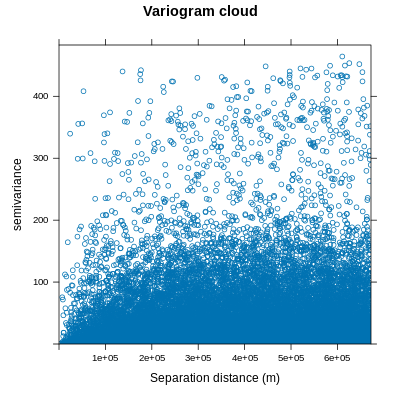

In [10]:
%%R -w 400 -h 400 -u px
plot(v.cloud, main = "Variogram cloud", xlab = "Separation distance (m)")

The variogram cloud shows all point pairs, but examining the general pattern of spatial dependence is difficult. To examine the spatial dependence, we will calculate the **empirical variogram**, which organizes the cloud into bins, like a histogram; there are two types of variograms accordingly to spatial correlation structure in different directions:

1. **Isotropic Variogram**:
Assumes that the spatial correlation structure is the same in all directions. The semivariance is constant for a given lag distance, regardless of the direction of separation.

2. **Anisotropic Variogram**:
Allows for variation in the spatial correlation structure along different directions. Anisotropic variograms account for the fact that spatial correlation may differ based on the orientation of the lag distance.

### Isotropic Variogram:

In [10]:
%%R
v<-variogram(SOC~ 1, data = train, cloud=F)
v

     np      dist    gamma dir.hor dir.ver   id
1   365  31001.73 17.35143       0       0 var1
2  1068  69069.94 20.51558       0       0 var1
3  1723 112915.67 21.52826       0       0 var1
4  2175 157397.98 22.96922       0       0 var1
5  2539 201937.17 23.09905       0       0 var1
6  2791 246920.87 25.35195       0       0 var1
7  2948 291241.25 26.78101       0       0 var1
8  3012 336784.06 25.41144       0       0 var1
9  3255 381267.81 25.32358       0       0 var1
10 3167 425896.93 27.02911       0       0 var1
11 3161 470954.81 26.69260       0       0 var1
12 3161 515395.05 27.84871       0       0 var1
13 3211 560537.75 29.05988       0       0 var1
14 3027 605352.61 28.08681       0       0 var1
15 2964 649776.96 26.84878       0       0 var1


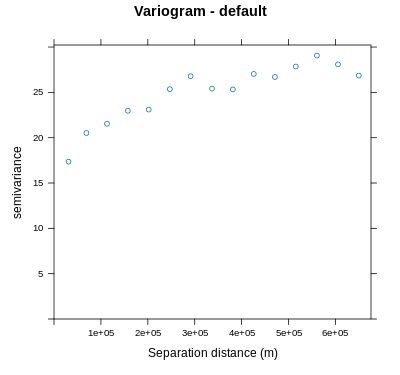

In [22]:
%%R -w 400 -h 375 -u px
plot(v, main = "Variogram - default", xlab = "Separation distance (m)")

We can set **cutoff** (maximum separation) to specify with the **cutoff**  argument, the bin width with the **width** optional argument to the variogram method.

**cutoff**: spatial separation distance up to which point pairs are included in semivariance estimates; as a default, the length of the diagonal of the box spanning the data is divided by three.

**width** is subsequent distance intervals into which data point pairs are grouped for semivariance estimates

Let’s try to calculate semivariogram with 500 Km cutoff and 2500 width

In [12]:
%%R
v.cut<-variogram(SOC ~ 1, train, cutoff=500000, width=500000/20)
v.cut

     np      dist    gamma dir.hor dir.ver   id
1    92  17324.39 18.90103       0       0 var1
2   366  38626.80 17.86771       0       0 var1
3   579  63283.93 20.49962       0       0 var1
4   771  88516.44 19.96508       0       0 var1
5   934 112690.56 22.92494       0       0 var1
6  1141 137726.09 22.48615       0       0 var1
7  1224 162798.57 21.93043       0       0 var1
8  1354 187296.10 24.67896       0       0 var1
9  1462 212528.05 22.14615       0       0 var1
10 1510 237535.36 25.48350       0       0 var1
11 1628 262525.37 26.02956       0       0 var1
12 1659 287534.76 26.84626       0       0 var1
13 1612 312479.30 25.76256       0       0 var1
14 1664 337695.53 24.89866       0       0 var1
15 1792 362319.71 25.29835       0       0 var1
16 1837 387804.89 26.06402       0       0 var1
17 1744 412436.23 26.18851       0       0 var1
18 1810 437271.38 27.48800       0       0 var1
19 1702 462544.83 26.55042       0       0 var1
20 1832 487475.53 27.71602       0      

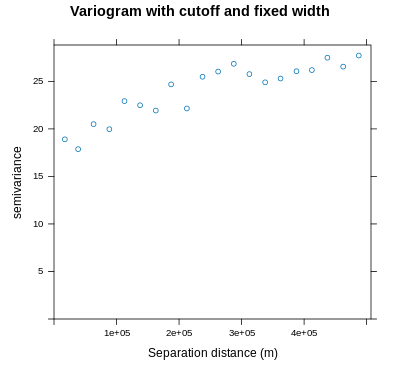

In [21]:
%%R -w 400 -h 375 -u px
plot(v.cut,main = "Variogram with cutoff and fixed width", xlab = "Separation distance (m)")

### Anisotropic Variogram

When spatial dependence (autocorrelation) is stronger in one direction than in others. We can detect anisotropy by visualization by the **variogram surface** (also called “variogram map”) and **directional variograms**.

### Variogram map

We will use the variogram method with the optional **map=TRUE** argument

In [14]:
%%R
v.map<-variogram(SOC ~ 1, train, map = TRUE, cutoff=600000, width=600000/17)

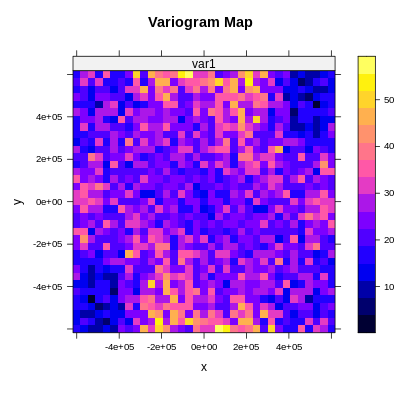

In [15]:
%%R -w 400 -h 400 -u px
plot(v.map, col.regions = bpy.colors(64),
     main="Variogram Map",
     xlab="x",
     ylab="y")

### Directional Variograms

Now, display the directional variograms of the SOC content at 30 degree N and 120 degree N, i.e. the suspected major and minor axes of the anisotropy ellipse.

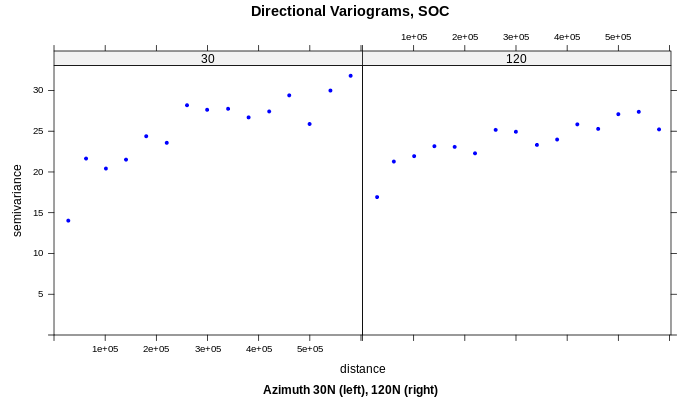

In [16]:
%%R -w 700 -h 400 -u px
plot(variogram(SOC ~ 1, train,
               alpha = c(30, 120),
               cutoff = 600000),
               main = "Directional Variograms, SOC",
               sub = "Azimuth 30N (left), 120N (right)",
               pch = 20, col = "blue")

## **Fitting Variogram Models**

The experimental variogram quantifies the spatial correlation at various lag distances and directions. It's a sample estimate of the true variogram and serves as the basis for model fitting. We usually observe semivarince in variogram plot and then select a reasonable model to fit a semivariogram curve to the empirical data. Least square method is applied to fit variogram in accordance with the principle of minimum variance estimate. The goal is to achieve the best fit, and also incorporate our knowledge of the phenomenon in the model. Choose a theoretical variogram model that is appropriate for the dataset.

Common variogram models include:
- **Spherical Variogram**: This model exhibits a rapid increase in semivariance up to a certain range, followed by a plateau (sill) beyond which semivariance remains constant. It is often used when spatial correlation is limited to a certain range.
- **Exponential Variogram**: The exponential model shows a continuous decrease in semivariance as lag distance increases. It is used when spatial correlation declines with distance, but no plateau is observed.
- **Gaussian Variogram**: The Gaussian model is similar to the spherical model but has a more gradual decline to the sill. It is used when spatial correlation is strong even at relatively large distances.
- **Linear Variogram**: This model assumes a linear relationship between lag distance and semivariance. It is used when spatial correlation is weaker and decreases linearly with distance.


There are several models available in gstat package to fit the variogram. We can see the forms of all the models in gstat with the **show.vgms()** function.


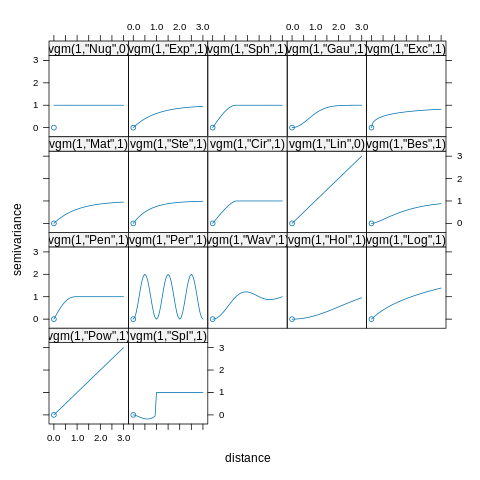

In [17]:
%%R
show.vgms()

### Estimate Model Parameters:

The selected variogram model typically has parameters that need to be estimated. The key parameters include:

- **Range**: The range indicates the distance beyond which spatial correlation is negligible. It is the distance at which the semivariance reaches the sill (plateau) in models like the spherical or Gaussian variogram.
- **Sill**: The sill represents the maximum semivariance (variance) of the data when the lag distance is large, and spatial correlation is no longer present.
- **Partial sill**: is, the difference between the total sill and the nugget. This is also known as the structural sill.
-**Nugget**: The nugget accounts for the spatial variability at very short distances, where data points are so close that they exhibit little to no spatial correlation. It can be thought of as the measurement error or micro-scale variability.

* For the nugget effect model, the sill is reached as soon as h > 0

* The spherical model reaches its sill at distance (actual range)

* The exponential and Guaussian models reach their sill asymptotically

First, we will use **vgm()** function to create a variogram model object and set range, sill, and nugget values by eye to fit the initial model, then automatically adjust the parameters using **fit.variogram()** function. We will fit the variogram with Exp (exponential) and Sph (spherical) models:

### **Exponential (Exp) Model**

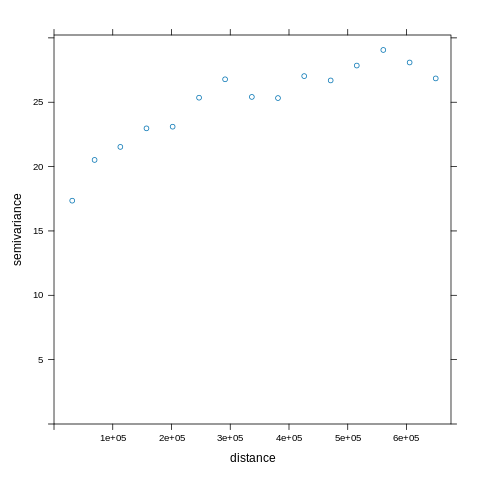

In [18]:
%%R %%R -w 400 -h 375 -u px
# Fiat
v<-variogram(SOC~ 1, data = train, cloud=F)
plot(v)

In [19]:
%%R
# Intial parameter set by eye esitmation
m.exp<-vgm(25,"Exp",25000,15)
# least square fit
m.exp.f<-fit.variogram(v, m.exp)
m.exp.f

  model    psill    range
1   Nug 15.33650      0.0
2   Exp 12.12062 151238.3


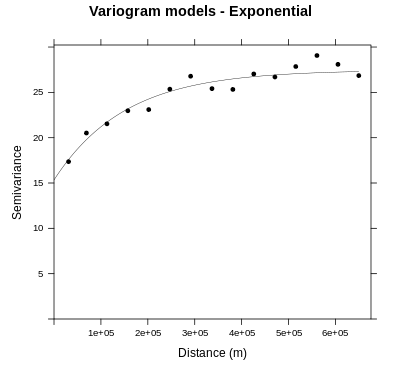

In [24]:
%%R -w 400 -h 375 -u px
plot(v, pl=F, model=m.exp.f,col="black", cex=1, lwd=0.5,lty=1,pch=20,
     main="Variogram models of SOC - Exponential",xlab="Distance (m)",ylab="Semivariance")

The variograms of SOC showed a clear spatial dependence with bounded sills and were fitted well with exponential models. The variance of SOC increases steadily with increasing lag distance and approaches its sill asymptotically within a range of 151238.3 m and autocorrelation may be extended to the effective range of 3 X 151238.3 m (3 times of range in exponential model).

### **Spherical (Sph) model**

In [31]:
%%R
### Intial parameter set by eye esitmation
m.sph<-vgm(15,"Sph",50000,10)
# least square fit
m.sph.f<-fit.variogram(v, m.sph)
m.sph.f

  model    psill    range
1   Nug 16.39391      0.0
2   Sph 10.13726 332880.5


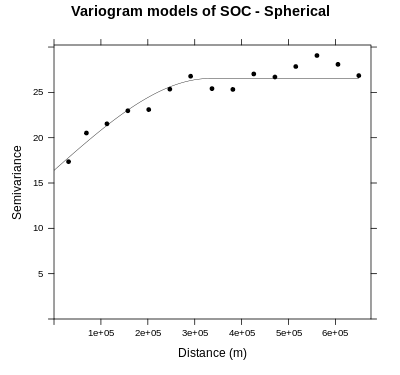

In [33]:
%%R -w 400 -h 375 -u px
plot(v, pl=F, model=m.sph.f,col="black", cex=1, lwd=0.5,lty=1,pch=20,
     main="Variogram models of SOC - Spherical",xlab="Distance (m)",ylab="Semivariance")

### **Goodness-of-fit**


Assessing the goodness-of-fit of a fitted variogram model is essential in geostatistical analysis to ensure that the model adequately represents the spatial correlation structure in the data. A well-fitted variogram model should closely match the experimental variogram derived from the observed data.

We can qauantify the sum of squared differences between the experimental and fitted variogram values (SSD). This metric quantifies the overall difference between the observed and model-predicted spatial correlations. A lower SSD indicates a better fit.

In [34]:
%%R
# SSD of Exponental Variagram
attributes(m.exp.f)$SSErr

[1] 3.779662e-07


In [35]:
%%R
# SSD of Spherical Variagram
attributes(m.sph.f)$SSErr

[1] 6.204291e-07


We can fit experimental variogram with a set of models, in which case the best fitting will be returned:

In [39]:
%%R
best_fit<-fit.variogram(v, vgm(c("Exp", "Sph", "Mat")))
best_fit

  model    psill    range
1   Nug 15.33636      0.0
2   Exp 12.12054 151229.3


## **Variogram Modeling with Transformed Data**

Many geostatistical methods assume the data follows a normal (Gaussian) distribution. While normality simplifies the analysis and is often a reasonable approximation, geostatistical models can accommodate non-Gaussian distributions, primarily through transformations or non-parametric techniques.

The best practice is to check the distribution and skewness of variables before variogram modeling.

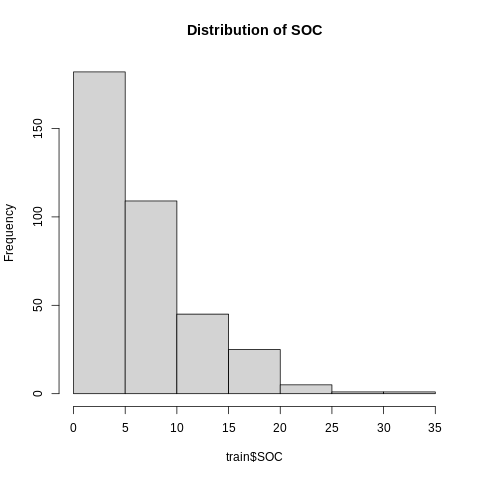

In [40]:
%%R -w 400 -h 375 -u px
hist(train$SOC,
     main= "Distribution of SOC")

In [41]:
%%R
skewness(train$SOC)

[1] 1.374332


In [42]:
%%R
# Normality test
shapiro.test(train$SOC)


	Shapiro-Wilk normality test

data:  train$SOC
W = 0.88087, p-value = 2.838e-16



From the above output, the p-value < 0.05 implies that the distribution of the SOC is significantly different from a normal distribution. In other words, we can assume that SOC is not normally distributed.

SOC values are highly skewed and not-normally distributed; it is better to use transformed data for geostatistical modeling

### **Log Transformation**

[1] -2.047026


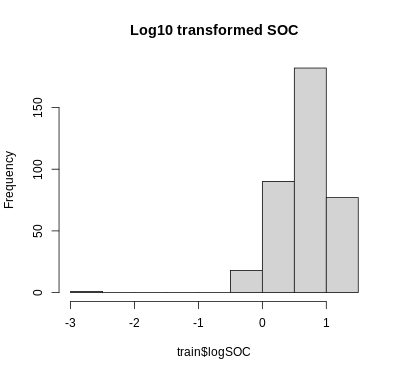

In [49]:
%%R -w 400 -h 375 -u px
train$logSOC<-log10(train$SOC)
hist(train$logSOC, main="Log10 transformed SOC")
skewness(train$logSOC)

### **Power transformation (Box-Cox)**

Power Transform uses the maximum likelihood-like approach of Box and Cox (1964) to select a transformation of a univariate or multivariate response for normality. First we have to calculate appropriate transformation parameters using powerTransform() function of car package and then use this parameter to transform the data using bcPower() function.

In [45]:
%%R
powerTransform(train$SOC)

Estimated transformation parameter 
train$SOC 
0.2987656 


[1] -0.1336237


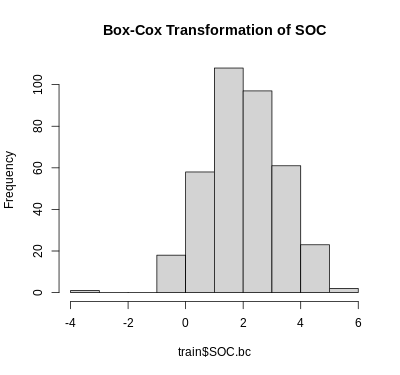

In [48]:
%%R -w 400 -h 375 -u px
train$SOC.bc<-bcPower(train$SOC, 0.2523339)
hist(train$SOC.bc,
     main="Box-Cox Transformation of SOC")
skewness(train$SOC.bc)

The power-transformed SOC is normally distributed, and skewness is near zero. So, we will use power-transformed SOC for further analysis. Let’s fit the variogram model with power-transformed data:

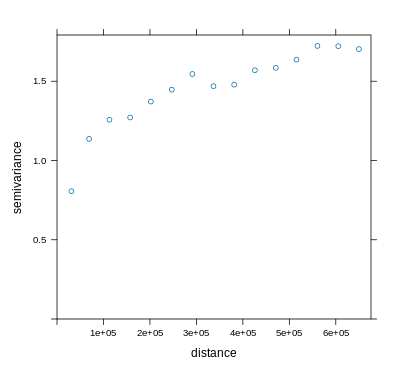

In [50]:
%%R -w 400 -h 375 -u px
v.bc<-variogram(SOC.bc~ 1, data = train, cloud=F)
plot(v.bc)

In [51]:
%%R
# Intial parameter set by eye esitmation
m.bc<-vgm(1.5,"Exp",40000,0.5)  # Exponential model
# least square fit
m.f.bc<-fit.variogram(v.bc, m.bc)

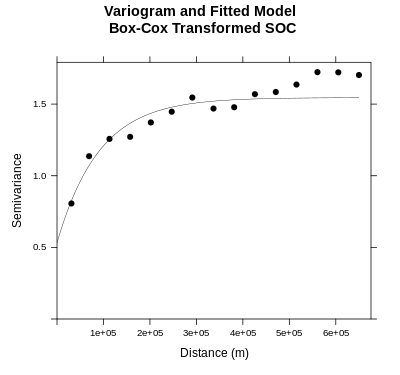

In [52]:
%%R -w 400 -h 375 -u px
#### Plot varigram and fitted model:
plot(v.bc, pl=F,
     model=m.f.bc,
     col="black",
     cex=0.9,
     lwd=0.5,
     lty=1,
     pch=19,
     main="Variogram and Fitted Model\n Box-Cox Transformed SOC",
     xlab="Distance (m)",
     ylab="Semivariance")

## **Fitting with Nested Models**

When you try to fit an empirical semivariogram by fitting a theoretical model, you might find that combining several models results in a more accurate fit onto the empirical semivariance than a single model. This is known as model nesting. The semivariance models resulting from the sum of two or more semivariance structures are called **nested models**.

Now, we will model an empirical variogram with two  structural components: A range structure with a spherical model and long-range structure



In [229]:
%%R
# Short range structure
v.bc<-variogram(SOC.bc~ 1, data = train, cloud=F)
# Add long range
vm.bc<-fit.variogram(v.bc, vgm(1, "Exp", 65000, add.to=vgm(0.5, "Exp", 2000)))
vm.bc

  model    psill    range
1   Exp 1.121053  26960.3
2   Exp 1.016791 718336.6


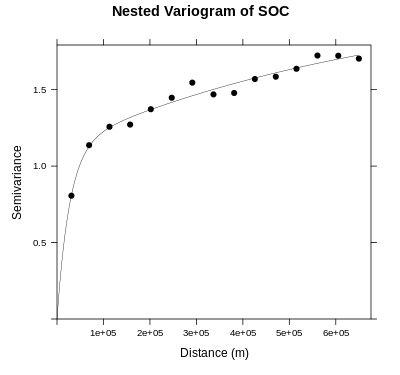

In [231]:
%%R -w 400 -h 375 -u px
# Plot varigram and fitted model:
plot(v, pl=F,
     model=vm.bc,
     col="black",
     cex=0.9,
     lwd=0.5,
     lty=1,
     pch=19,
     main="Nested Variogram of SOC",
     xlab="Distance (m)",
     ylab="Semivariance")